## Astrocytes

525 525 3


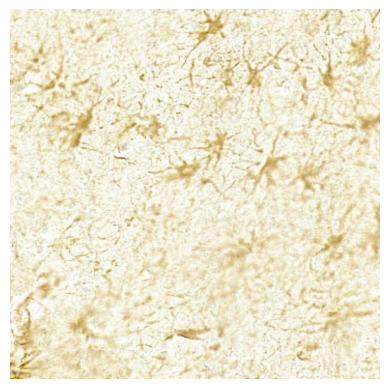

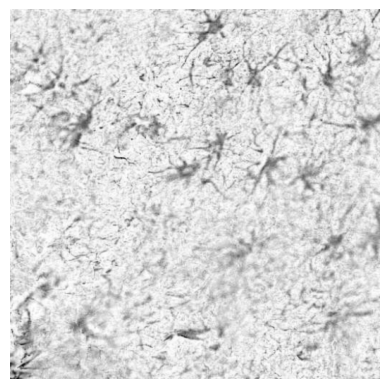

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#resize
img = cv2.imread("/home/htic/Desktop/raisa/B_313_1373/tile_31744_218624.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height,width,channels=img.shape
#print(f"{height} {width} {channels}")
#525 527 3

img=cv2.resize(img,(525,525))
height,width,channels=img.shape
print(f"{height} {width} {channels}")

#rgb image
plt.imshow(img)
plt.axis('off')
plt.show()

#grayscale image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

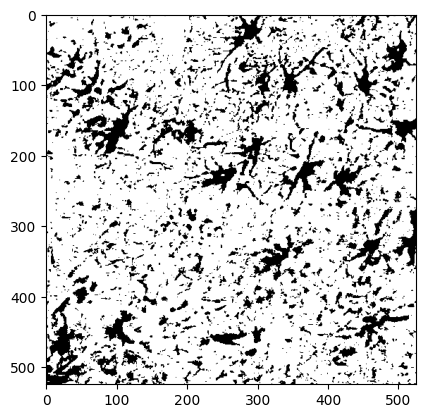

In [3]:
clahe = cv2.createCLAHE(clipLimit=5)
clahe_img = np.clip(clahe.apply(img_gray) + 20, 0, 255).astype(np.uint8)
_, threshold_img = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_img,cmap='gray')

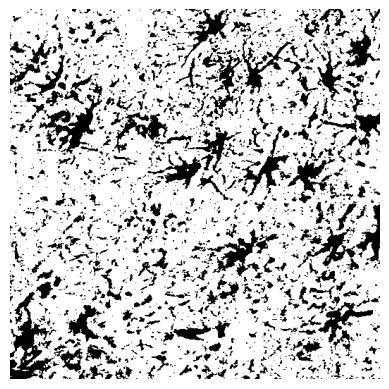

In [4]:

_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(otsu_thresh,cmap='gray')

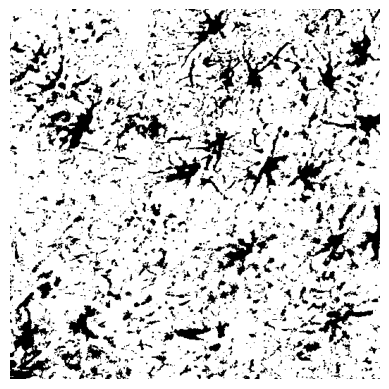

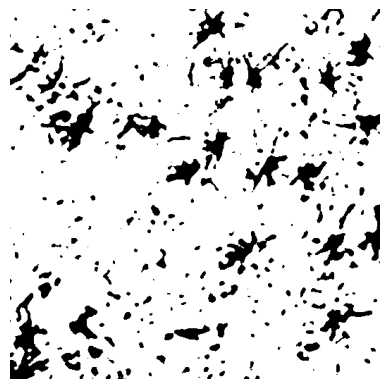

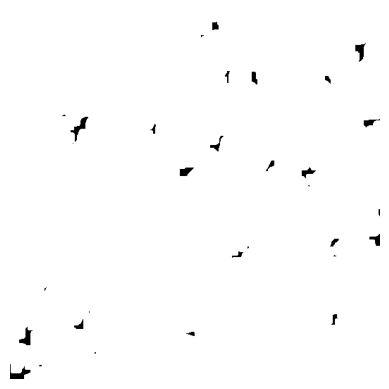

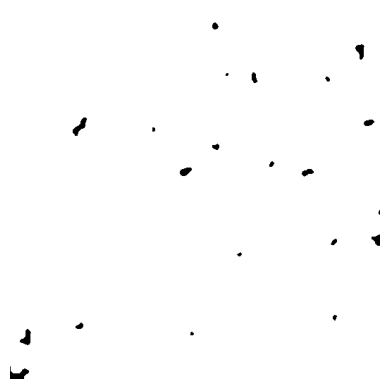

In [5]:
output=threshold_img.copy()
blurred = cv2.GaussianBlur(output, (3, 3), 0)
median_blurred = cv2.medianBlur(output, 7)

kernel = np.ones((11,11), np.uint8)
eroded_image = cv2.erode(~median_blurred, kernel, iterations=1)

median_blurred2 = cv2.medianBlur(eroded_image, 7)
plt.imshow(output,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(median_blurred,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(~eroded_image,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(~median_blurred2,cmap='gray')
median_blurred2_array=np.array(median_blurred2)
plt.axis('off')
plt.show()

(525, 525, 3)
(12, 518)
(257, 460)
(23, 466)
(98, 449)
(460, 437)
(325, 347)
(459, 330)
(520, 327)
(523, 288)
(421, 231)
(248, 230)
(370, 219)
(291, 195)
(203, 170)
(508, 160)
(98, 166)
(450, 99)
(307, 92)
(346, 97)
(496, 58)
(290, 23)


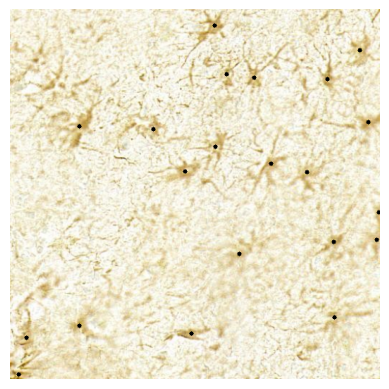

In [21]:
centroid_img=img.copy()
contours, hierarchy = cv2.findContours(median_blurred2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
centres=[]
for c in contours:
   
   M = cv2.moments(c)
 
   cX = int(M["m10"] / M["m00"])
   cY = int(M["m01"] / M["m00"])
   cv2.circle(centroid_img, (cX, cY), 3, (0, 0, 0), -1)
   centres.append((cX, cY))

print(centroid_img.shape)
for i in centres:
   print(i)   
plt.imshow(centroid_img,cmap='gray')
plt.axis('off')
plt.show()

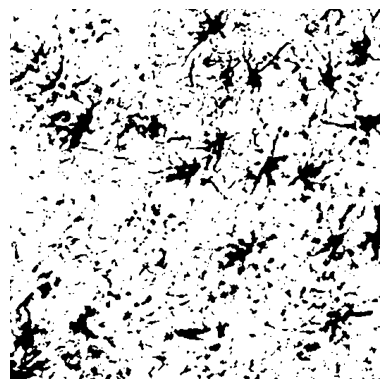

(525, 525)


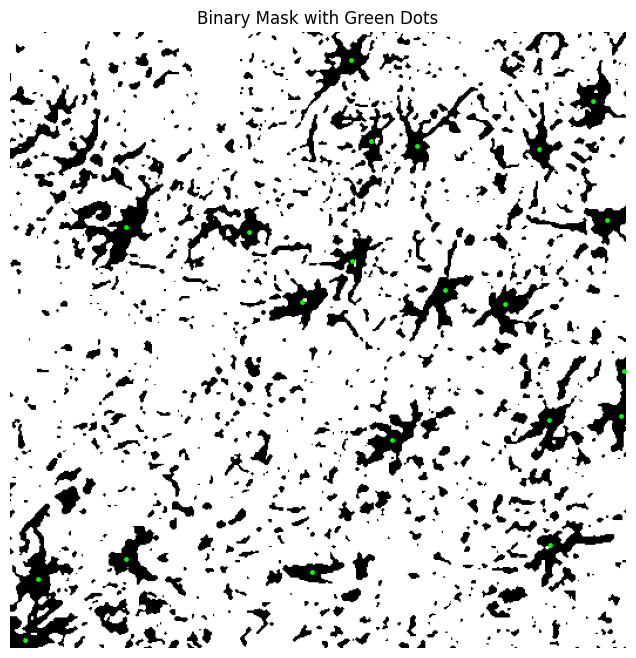

(525, 525)
(12, 257, 23, 98, 460, 325, 459, 520, 523, 421, 248, 370, 291, 203, 508, 98, 450, 307, 346, 496, 290)
(518, 460, 466, 449, 437, 347, 330, 327, 288, 231, 230, 219, 195, 170, 160, 166, 99, 92, 97, 58, 23)


In [24]:
floodfill=threshold_img.copy()
floodfill_blurred = cv2.medianBlur(floodfill, 3)
plt.imshow(floodfill_blurred,cmap='gray')
plt.axis('off')
plt.show()

floodfill_blurred_array=np.array(floodfill_blurred)
# for x,y in centres:
#     print(floodfill_blurred_array[x][y])
print(floodfill_blurred_array.shape)

binary_mask_normalized = floodfill_blurred / 255.0  # Normalize for display (0 to 1)

# Unpack x and y from centres
ys, xs = zip(*centres)  # y = row, x = col

plt.figure(figsize=(8, 8))
plt.imshow(binary_mask_normalized, cmap='gray')
plt.scatter(ys, xs, c='lime', s=6, marker='o')  # Green dots
plt.axis('off')
plt.title("Binary Mask with Green Dots")
plt.show()


print(binary_mask_normalized.shape)
for i in zip(*centres):
   print(i)   

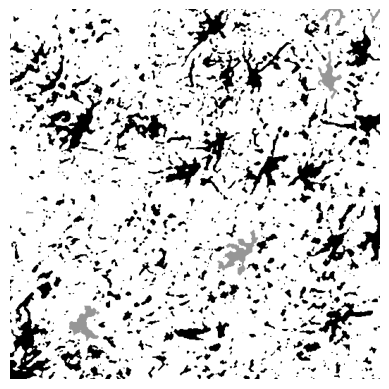

150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
255
150
150
150
150


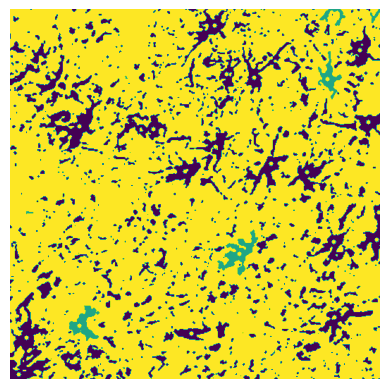

In [ ]:
#bfs flood fill 4-connected

from collections import deque

def flood_fill_multi_source(grid, sources, new_color):
    rows, cols = len(grid), len(grid[0])
    original_color = 0
    
    if original_color == new_color or original_color==255:
        return grid

    queue = deque()
    
    for x, y in sources:
        if grid[x][y] == original_color:
            grid[x][y] = new_color
            queue.append((x, y))
    
    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == original_color:
                grid[nx][ny] = new_color  
                queue.append((nx, ny))
        
    
    return grid


grid = floodfill_blurred_array.copy()
sources = [(x, y) for x, y in centres if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]]
for x, y in sources:
    grid[x][y]=0
new_color = 150

result = flood_fill_multi_source(grid, sources, new_color)
cv2.imwrite("floodfill2.jpeg", result)  
plt.imshow(result,cmap='gray')
plt.axis('off')  
plt.show()

# for x,y in centres:
#     print(grid[x][y])
#     cv2.circle(result, (x,y), 3, (255,0, 0), -1)
    
# plt.imshow(result)
# plt.axis('off')  
# plt.show()

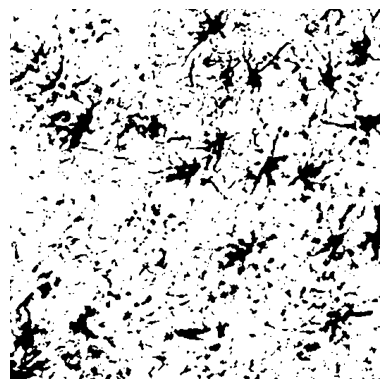

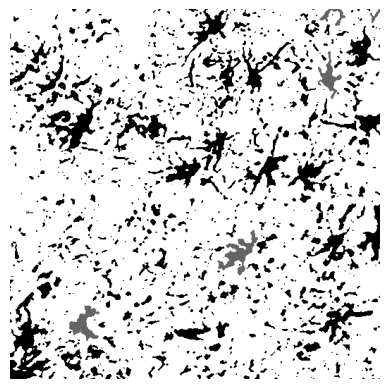

In [62]:
#dfs based 4 connected flood fill

def dfs(image, x, y, oldColor, newColor):
  
    # Check boundary conditions and color match
    if (x < 0 or x >= len(image) or y < 0 or 
        y >= len(image[0]) or image[x][y] != oldColor):
        return

    # Change the color
    image[x][y] = newColor

    # Visit all adjacent pixels
    dfs(image, x + 1, y, oldColor, newColor)
    dfs(image, x - 1, y, oldColor, newColor)
    dfs(image, x, y + 1, oldColor, newColor)
    dfs(image, x, y - 1, oldColor, newColor)

def floodFill(image, sr, sc, newColor):
  
    rows, cols = len(image), len(image[0])
    oldColor = image[sr][sc]
    
    if oldColor == newColor or oldColor == 255:
        return image

    stack = [(sr, sc)]

    while stack:
        x, y = stack.pop()

        if (0 <= x < rows and 0 <= y < cols and image[x][y] == oldColor):
            image[x][y] = newColor
            stack.extend([
                (x + 1, y), (x - 1, y),
                (x, y + 1), (x, y - 1)
            ])
    return image


grid = floodfill_blurred_array.copy()
plt.imshow(grid,cmap='gray')
plt.axis('off')  
plt.show()
newColor = 100


for sr,sc in sources:
    grid[sr][sc] = 0
    grid = floodFill(grid, sr, sc, newColor)

result = grid.copy()
cv2.imwrite("floodfill1.jpeg", result)   
plt.imshow(result,cmap='gray')
plt.axis('off')  
plt.show()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


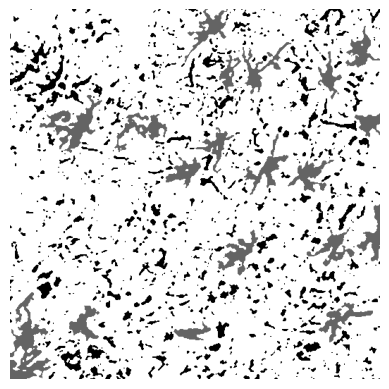

In [25]:
#bfs flood fill 8-connected

from collections import deque

def flood_fill_multi_source(grid, sources, new_color):
    rows, cols = len(grid), len(grid[0])
    original_color = 0
    
    if original_color == new_color:
        return grid

    queue = deque(sources)
    
    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1),(1,1),(-1,-1),(1,-1),(-1,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == original_color:
                grid[nx][ny] = new_color  
                queue.append((nx, ny))
        grid[x][y] = new_color
    
    return grid


grid = floodfill_blurred_array.copy()
sources = [(y, x) for x, y in centres]
for x, y in sources:
    print(grid[x][y])
new_color = 100

result = flood_fill_multi_source(grid, sources, new_color)
# for row in result:
#     print(row)
    
plt.imshow(result,cmap='gray')
plt.axis('off')  
plt.show()

# for x,y in centres:
#     print(grid[x][y])
#     cv2.circle(result, (x,y), 3, (255,0, 0), -1)
    
# plt.imshow(result)
# plt.axis('off')  
# plt.show()

518 12
460 257
466 23
449 98
437 460
347 325
330 459
327 520
288 523
231 421
230 248
219 370
195 291
170 203
160 508
166 98
99 450
92 307
97 346
58 496
23 290


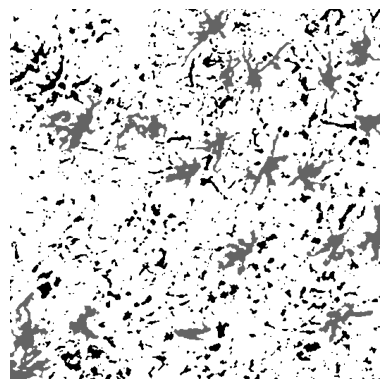

In [26]:
#bfs flood fill 4-connected - breakdown

from collections import deque

def flood_fill_multi_source(grid, sources, new_color):
    rows, cols = len(grid), len(grid[0])
    original_color = 0
    
    # if original_color == new_color or original_color==255:
    #     return grid

    queue = deque()
    
    for x, y in sources:
        grid[x][y] = 100
        queue.append((x, y))
    
    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == original_color:
                grid[nx][ny] = new_color  
                queue.append((nx, ny))
        
    
    return grid


grid = floodfill_blurred_array.copy()
sources = [(y, x) for x, y in centres]

for x, y in sources:
    print(x,y)
    grid[x][y]=0
    
new_color = 100

result = flood_fill_multi_source(grid, sources, new_color)

#count= 3263
cv2.imwrite("floodfill2.jpeg", result)  



    
plt.imshow(result,cmap='gray')
plt.axis('off')  
plt.show()